# K-MEANS - UNSUPERVISED LEARNING

**Scope**:

Compute the K-Means algorithm without use pre-compiled libraries such as ScikitLearn

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt

## 2. Defining Functions

In [14]:
def initial_centroids(X, n_centroids):
    """
    args:
        X (ndarray): (m, n) array containing our examples
        n_centroids (int): number of centroids (clusters) we want to create
    output:
        init_centroids (ndarray): (k, n) array of centroids
    """
    np.random.seed(314)
    init_centroids = X.copy()
    np.random.shuffle(init_centroids) # Randomly shuffle our examples
    init_centroids = init_centroids[:n_centroids] # Pick the first n_centroids among our randomly shuffled
    return init_centroids

In [15]:
def find_closest_centroids(X, centroids):
    """
    Compute the norm for each example to see which centroid (and therefor cluster) it belongs to.
    args:
        X (ndarray): (m, n) array of examples
        centroids (ndarray): (k, n) array of centroids u_k
    output:
        idx (ndarray): (m, ) array of indices of centroids, one for each example x_i. x_i belongs to the centroid with index k
    """
    m, n = X.shape
    K = centroids.shape[0]
    idx = np.zeros(m, dtype = int)
    for i in range(m):
        norms_list = np.zeros(K)
        for k in range(K):
            norm = np.linalg.norm(X[i] - centroids[k])
            norm = norm**2
            norms_list[k] = norm
        idx[i] = np.argmin(norms_list)
    return idx

In [16]:
def compute_centroids(X, idx, K):
    """
    Return a ndarray of newly computed centroids calculated as the mean among all the points inside each cluster.
    args:
        X (ndarray): (m, n) array of examples
        idx (ndarray): (m, ) array of indices of centroids. Each position is the centroid matches to that same position's example
        K (int): number of centroids (clusters / classes) defined
    output:
        centroids (ndarray): (k, n) array of the k newly computed centroids
    """
    m, n = X.shape
    new_centroids = np.zeros((K,n))
    for k in range(K):
        centroid = np.mean(X[idx == k], axis = 0)
        new_centroids[k] = centroid
    return new_centroids

In [17]:
def compute_k_means(X, initial_centroids, max_iter = 10, plot_progress = False):
    """
    Compute K-Means algorithm and optionally show the plot
    args:
        X (ndarray): (m, n) array of examples
        initial_centroids (ndarray): (k, n) array of initial centroids
        max_iter (int): max number of iterations. Default set to 10
        plot_progress (bool): True if you want the plot of k means. Default False
    output:
        centroids (ndarray): (k, n) position of the final centroids
        indices (ndarray): (m, ) array of indices showing what cluster each example belongs to
    """
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    centroids_hist = np.zeros((max_iter, K, n))
    # Computing KMeans
    for i in range(max_iter):
        print(f"Running iteration {i}/{max_iter-1}...")
        centroids_hist[i] = centroids
        indices = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, indices, K)

    # Plotting KMeans
    if plot_progress:
        color = plt.cm.rainbow(np.linspace(0,1,K)) # rainbow color space to loop through when plotting multiple plots
        fig, ax = plt.subplots(figsize = (4,4))
        fig.tight_layout()
        ax.set_title("K-Means Algorithm in Action")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        for k in range(K):
            ax.scatter(X[indices==k,0], X[indices==k,1], color = color[k], marker = 'o', facecolor = 'none')
        ax.plot(centroids_hist[:,:,0], centroids_hist[:,:,1], markersize = 8, c = 'black', marker = 'x')
    return centroids, indices

## 3. Computing Algorithm

In [18]:
# Creating random samples size (300,2)
X = np.random.rand(300,2)
X[:5]

array([[0.85469273, 0.24648895],
       [0.50448067, 0.48788701],
       [0.18614227, 0.63334146],
       [0.33597916, 0.91907679],
       [0.80805369, 0.71201273]])

Running iteration 0/9...
Running iteration 1/9...
Running iteration 2/9...
Running iteration 3/9...
Running iteration 4/9...
Running iteration 5/9...
Running iteration 6/9...
Running iteration 7/9...
Running iteration 8/9...
Running iteration 9/9...


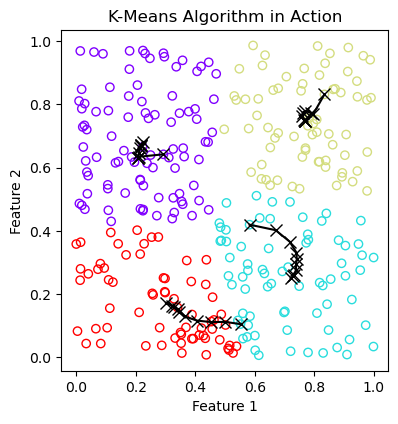

In [20]:
# Launching and plotting KMeans
init_centroids = initial_centroids(X, 4)
centroids, indices = compute_k_means(X, init_centroids, max_iter = 10, plot_progress = True)